In [1]:
import os
from crnn import CRNN
import torch
import torchvision
import dataset
from torch.autograd import Variable
import utils
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nh = 100
alphabet = '0123456789'
nclass = len(alphabet) + 1
nc = 1
mynet = CRNN(32, nc, nclass, nh)

In [3]:
converter = utils.strLabelConverter(alphabet)

In [4]:
mynet.load_state_dict(torch.load('./crnn_model-gru.pth'))
mynet = mynet.cuda()

In [5]:
def show_result(img_name):
    root = '/home/sherlock/Documents/express_recognition/data/validation/telephone'
    img_path = os.path.join(root, img_name)
    transformer = dataset.resizeNormalize((256, 32))
    image = Image.open(img_path).convert('L')
    image = transformer(image).cuda()
    image = image.view(1, *image.size())
    image = Variable(image)
    
    mynet.eval()
    preds = mynet(image) # sequence_length x batch_size x n_classes
    _, preds = preds.max(2) # sequence_length x batch_size x 1
    preds = preds.view(-1) # sequence_length x 1
    preds_size = torch.IntTensor([preds.size(0)])
    raw_pred = converter.decode(preds.data, preds_size, raw=True)
    sim_pred = converter.decode(preds.data, preds_size, raw=False)
    pic = Image.open(img_path)
    plt.imshow(pic)
    plt.show()
    print('{} => {}'.format(raw_pred, sim_pred))

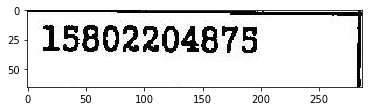

1155-88022222044887755---------- => 1580204875


In [6]:
show_result('1_27.jpg')

In [192]:
root = '/home/sherlock/Documents/express_recognition/data/validation/telephone'
img_path = os.path.join(root, '17_210_1_1.png')
transformer = dataset.resizeNormalize((128, 32))
image = Image.open(img_path).convert('L')
image = transformer(image).cuda()
image = image.view(1, *image.size())
image = Variable(image)

mynet.eval()
preds = mynet(image) # preds sequence_length x batch_size x n_classes

In [193]:
preds = preds.squeeze(1)

In [194]:
import torch.nn.functional as F

In [195]:
preds = F.softmax(preds)

In [196]:
prob, label = torch.max(preds, 1)

In [197]:
tele = ''
for i in range(label.size(0)):
    if prob[i].cpu().data[0] > 0.9:
        if label[i].cpu().data[0] == 0:
            tele += '-'
        else:
            tele += str(label[i].cpu().data[0]-1)

In [198]:
tele

'1155111071445555-55577777------'

In [ ]:
for i in range(preds.size(0)):
    label = preds.cpu().data[i, :]
    label = label.numpy()
    plt.plot(label)
    plt.title('{}'.format(i))
    plt.show()

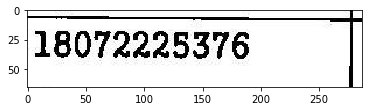

118-00772-22225337768----------- => 18072253768



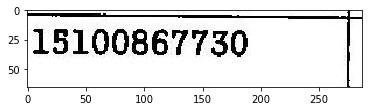

115-2000088-677773-00----------- => 152086730



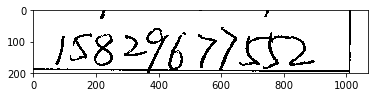

1155--8-2299-4777-775-5-22------ => 15829477552



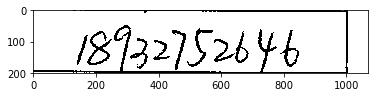

118----993-227755226444-6------- => 18932752646



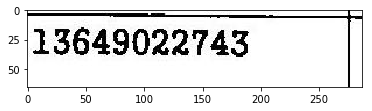

113-66449-022-2774435----------- => 136490227435



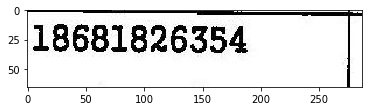

118-668-2882266335544----------- => 18682826354



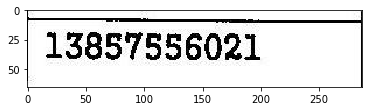

113338855775-556-022-1---------- => 13857556021



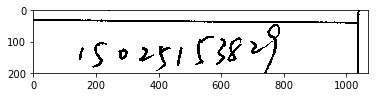

115----002255115-38-229--------- => 15025153829



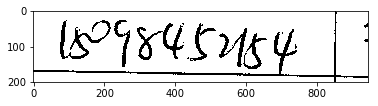

118-----988-4455-22155444------- => 1898452154



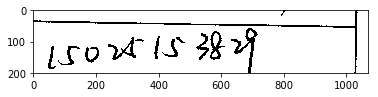

115500-24411553388229----------- => 15024153829



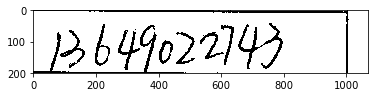

1133-66-4490022-27744133-------- => 136490227413



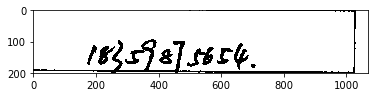

118-----5599-11-4--4------------ => 1859144



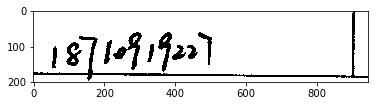

118--711991192227--------------- => 187191927



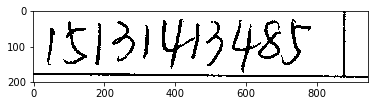

1155-113311144113-44488-55------ => 15131413485



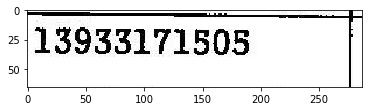

113-99333322727550055----------- => 13932727505



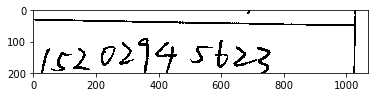

11-22-0222974455-6-2-33--------- => 12029745623



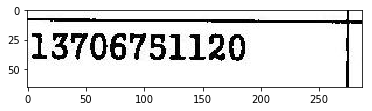

113-70066775-7---2-00----------- => 1370675720



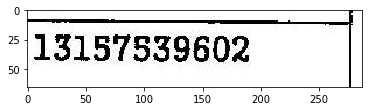

115-715-775-3-9660022----------- => 157157539602



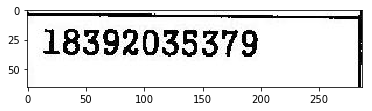

1188833922203355337789---------- => 183920353789



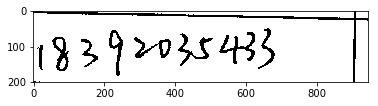

118-3399922003355443333--------- => 1839203543



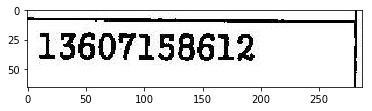

115--6-077-555886-7-22---------- => 1560758672



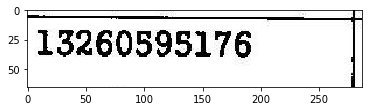

11332266005-9----7766----------- => 132605976



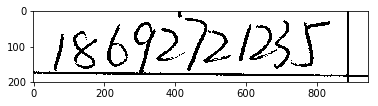

1188--66-992227722211233355----- => 18692721235



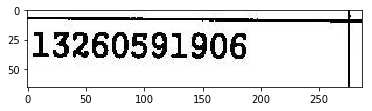

113-2260055-97-990066----------- => 13260597906



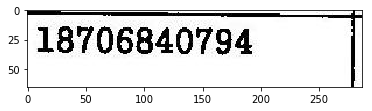

118877006688--00779-4----------- => 1870680794



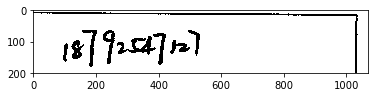

118877992-09122----------------- => 187920912



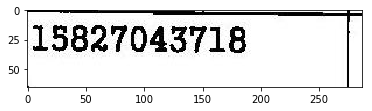

11588-22700443377--8------------ => 1582704378



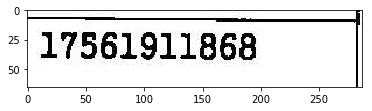

117775-622892---886688---------- => 17562892868



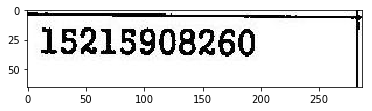

1155-2223599008-226-00---------- => 15235908260



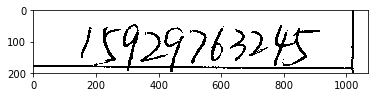

118-----9922-777-633224455------ => 1892763245



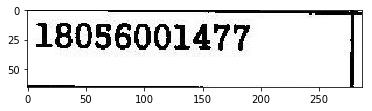

118-0055660--22-477-7----------- => 1805602477



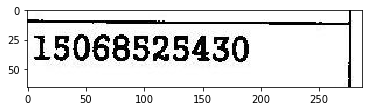

115-00668-52225443300----------- => 15068525430



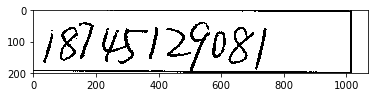

118-7744551122299088-11--------- => 18745129081



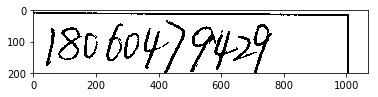

118-006---4477-99422299--------- => 1806479429



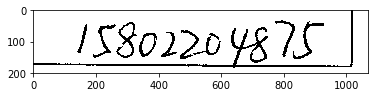

115-----8-022-22004488-775------ => 15802204875



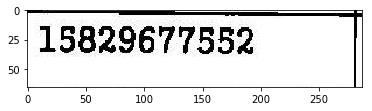

11558822996677-75-5-22---------- => 15829677552



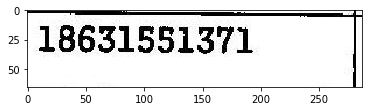

11886633-75-55--3-771----------- => 1863755371



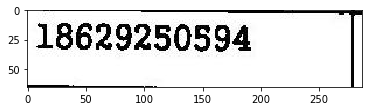

118-662289225003539-4----------- => 18628925035394



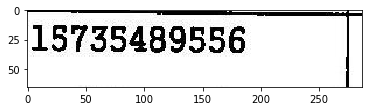

115-77355448899555-6------------ => 1573548956



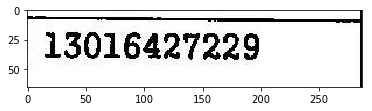

1133-00006-4-2-72-2299---------- => 1306427229



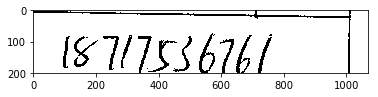

1188--77177555566776611--------- => 1871756761



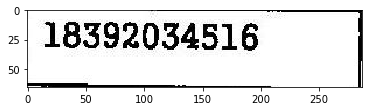

1188-338222233-455-26----------- => 1838234526



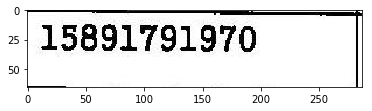

115588-922779922997-00---------- => 15892792970



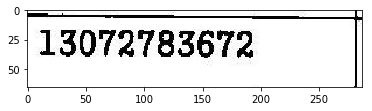

1133-077227788336-7-22---------- => 13072783672



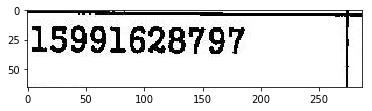

115-999226-2288778-77----------- => 1592628787



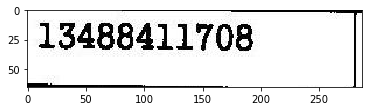

1133----8844--2270088----------- => 13842708



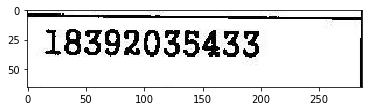

11883339222033-5443333---------- => 1839203543



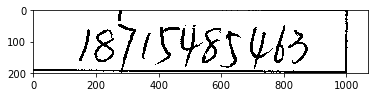

118-----77155-418-5544-633------ => 187154185463



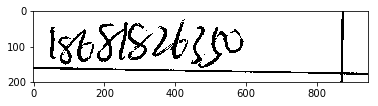

118-6-8-65-22663-500------------ => 18686526350



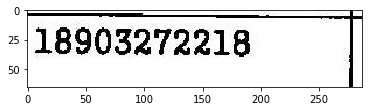

118-99005-22722-22788----------- => 18905272278



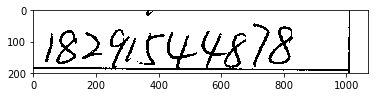

118-22-9915--4--4488-715-------- => 182915448715



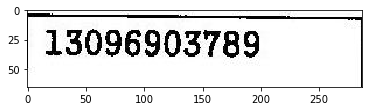

1133300996-99033778899---------- => 13096903789



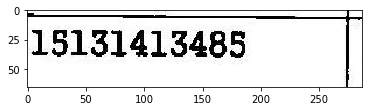

115-133-7447333-48855----------- => 15137473485



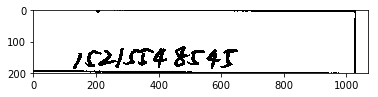

115---2-4--441-5455------------- => 152441545



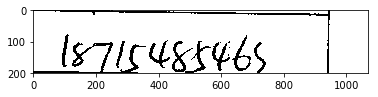

1188--7115-448-55446-5---------- => 18715485465



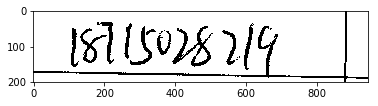

118---77155-0228--2119---------- => 18715028219



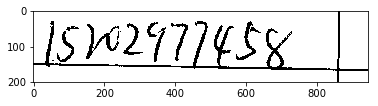

115-720022-9777774455-8--------- => 15720297458



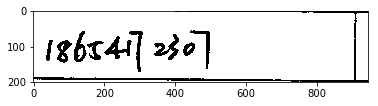

118-6--447722-077--------------- => 18647207



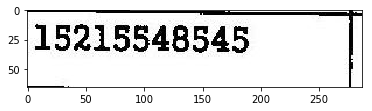

113-22-7555448-554455----------- => 1327548545



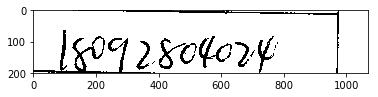

1188-00992288-044002-44--------- => 18092804024



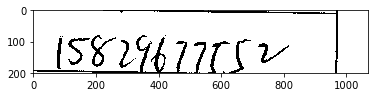

115--88-2-9667777155-22--------- => 1582967152



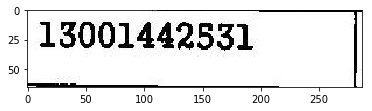

1133-0-022444522533-27---------- => 130024525327



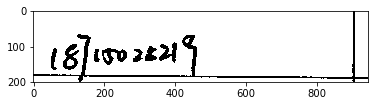

118-710002-22999---------------- => 18710229



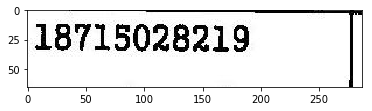

118-772-5-0228822--99----------- => 1872502829



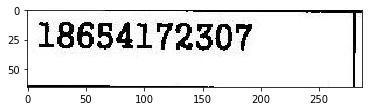

1188-65544--772-330-77---------- => 1865472307



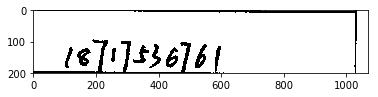

115--77-7535-27--1-------------- => 1577535271



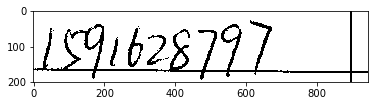

115--9114622-8--7-99777--------- => 15914628797



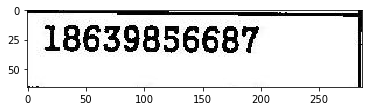

1188-66339985566668877---------- => 1863985687



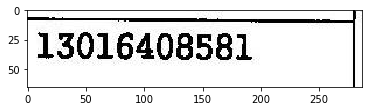

113-00276644008---8-7----------- => 13027640887



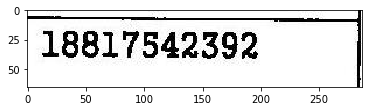

1188-8---7554422339922---------- => 1887542392



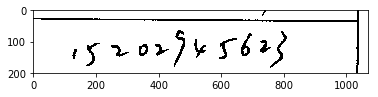

115----2200229-005566223-------- => 15202905623



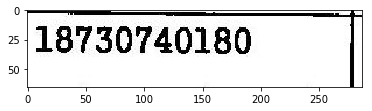

1188773-00774-0-788-0----------- => 18730740780



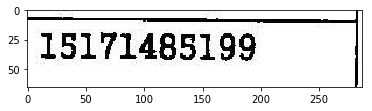

1155-2-722448855-29-99---------- => 15272485299



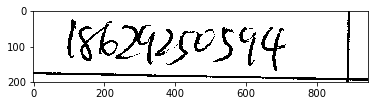

1188--6-294023-0-5599444-------- => 1862940230594



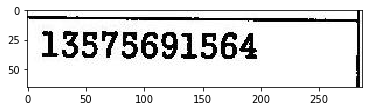

1133-5-75566-91-556644---------- => 13575691564



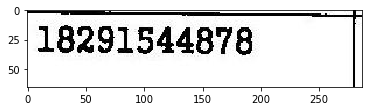

118822997-5544-48-788----------- => 18297544878



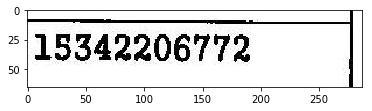

115-35442--2006-7-722----------- => 153542206772



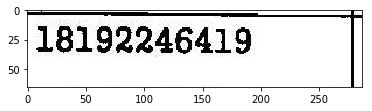

118822992222466-42299----------- => 1829246429



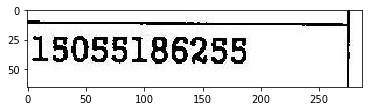

115-005-5-28866225555----------- => 1505528625



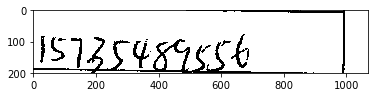

15577--554488945-5-6------------ => 15754894556



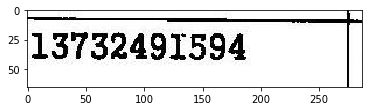

113-773-22488--559-44----------- => 1373248594



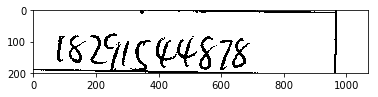

118--2-1155444488778------------ => 182154878



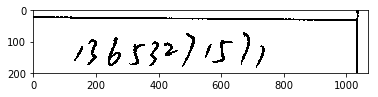

118----6-53322771557711--------- => 18653271571



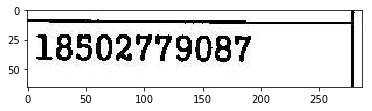

118--5002277779-088777---------- => 1850279087



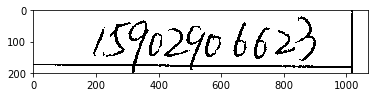

118------9902297006666-2233----- => 18902970623



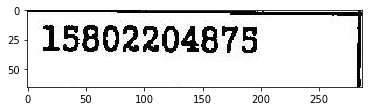

1155-88022222044887755---------- => 1580204875



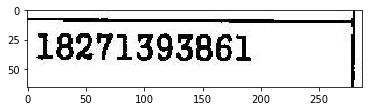

118-2277-13-933-866-7----------- => 18271393867



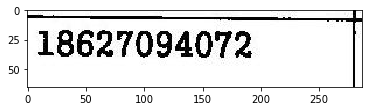

118866227700994007722----------- => 18627094072



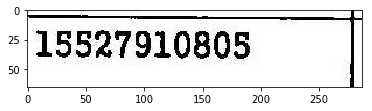

115-5522779-300-80055----------- => 15527930805



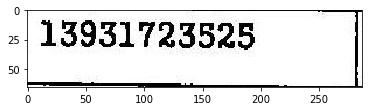

1133-833-27722335-225----------- => 13832723525



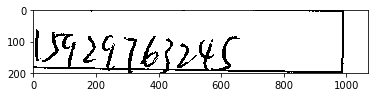

155122-077663224445------------- => 15120763245



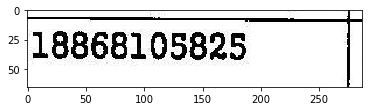

118-886-81-0055882255----------- => 18868105825



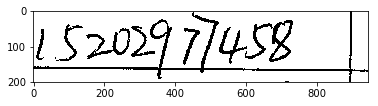

115--22002-99177774455-8-------- => 15202917458



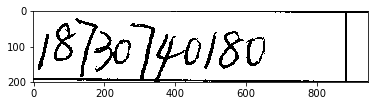

118-773-07774401118-00---------- => 18730740180



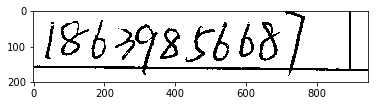

118--6-33-998-55-666688-77------ => 1863985687



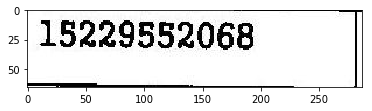

115522-2-95555220-6-88---------- => 1522952068



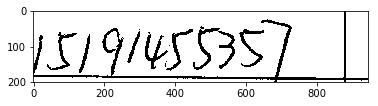

115-1199114455-5533-55-77------- => 15191455357



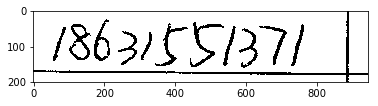

1188--6-33115--5-1133-7711------ => 18631551371



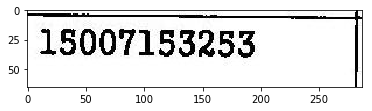

1155-0-077755333225-3----------- => 1500753253



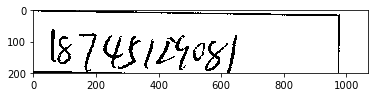

118-7744551129008811------------ => 18745129081



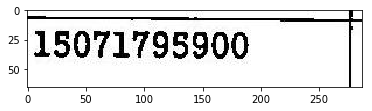

115-0077-7799559900-0----------- => 1507795900



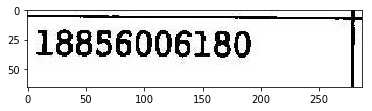

118-885-66000-62288-0----------- => 1885606280



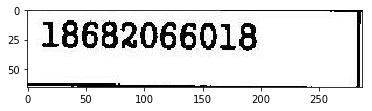

1-38-668-2-06-66-02-8----------- => 138682066028



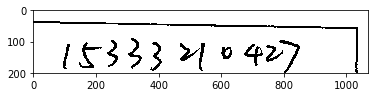

115---3333-33221100-422277------ => 1533210427



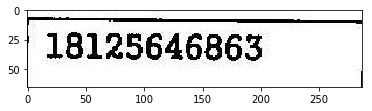

115881122556-4466866-3---------- => 158125646863



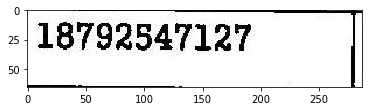

1188779922554-7--22-7----------- => 1879254727



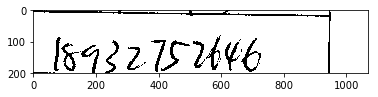

118-113--2-77522664-6----------- => 18132752646



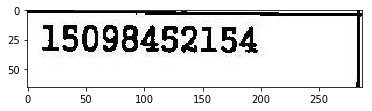

1158-00998-45522-75544---------- => 158098452754



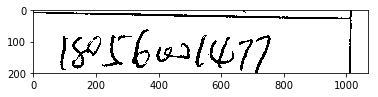

118--055-6-00-211447777--------- => 1805602147



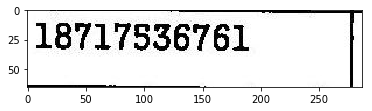

118877--7753386-76677----------- => 18775386767



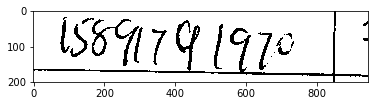

115--88-9117789-11-9-770-------- => 158917891970



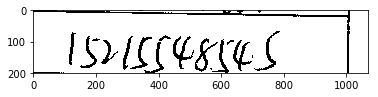

115---22155554488544--5--------- => 1521548545



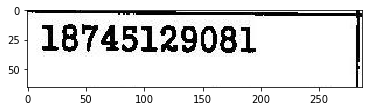

1188-77455-22299008-7----------- => 1874529087



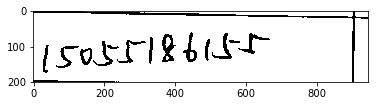

115-0055-5118-61155-55---------- => 15055186155



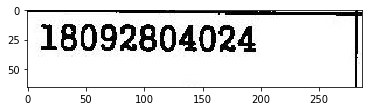

1188-09922880044002244---------- => 18092804024



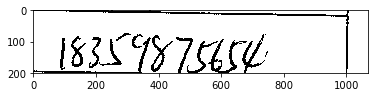

1188-3-559888775-65-66---------- => 18359875656



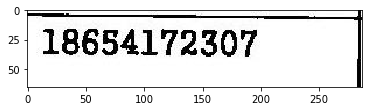

118886-5-47-7722330077---------- => 18654772307



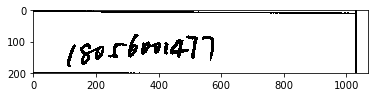

1188--05-60044---7-------------- => 18056047



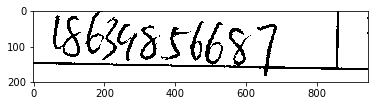

115--6--418-55-66-88-77--------- => 1564185687



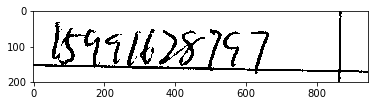

115--9-2146-2-887791777--------- => 1592146287917



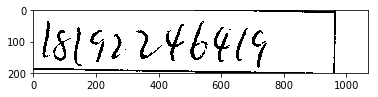

11811992-22-4466-44199---------- => 18192246419



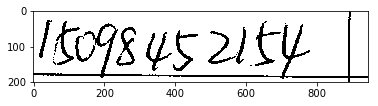

115-09978-44-55-222115-144------ => 1509784521514



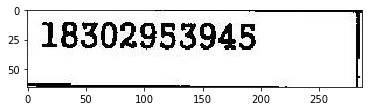

1188-3-022-8-553994-55---------- => 18302853945



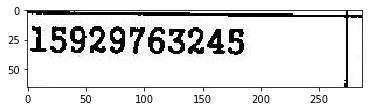

115-922-9776633224-5------------ => 15929763245



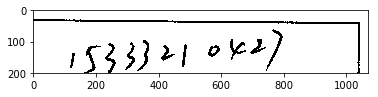

115---33333221110044-277-------- => 153210427



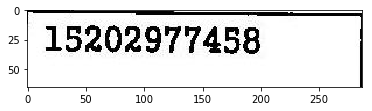

1135-22002299777445588---------- => 13520297458



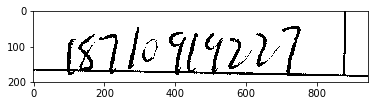

118---77110-99111122-2277------- => 1871091227



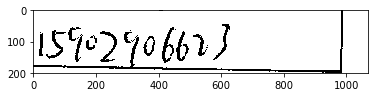

1551102211066662-33------------- => 1510210623



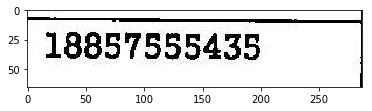

118888855775-555463--5---------- => 1857554635



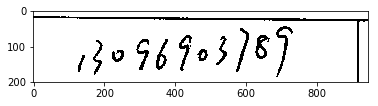

118----00996699003-775-9-------- => 18096903759



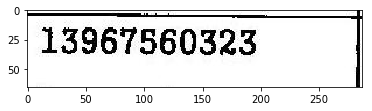

113339-6-75-66003-2233---------- => 13967560323



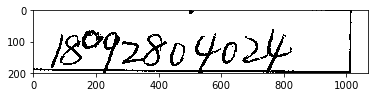

118---992288000444022-44-------- => 1892804024



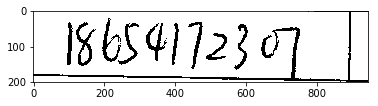

118---4-554411772233300-77------ => 18454172307



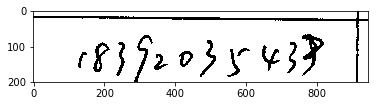

118----3399220033--5544-339----- => 18392035439



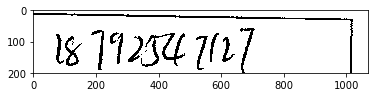

1188-77922-544-771277----------- => 18792547127



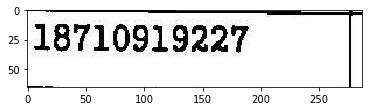

118-77700-92-99222277----------- => 187092927



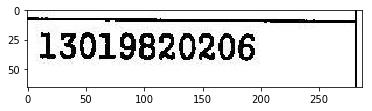

1133-03-9988220022006----------- => 13039820206



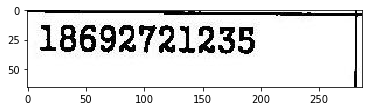

1188-6-9227722--223-5----------- => 1869272235



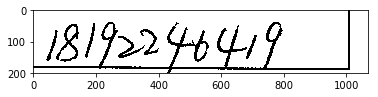

118811992-224446-44-119--------- => 18192246419



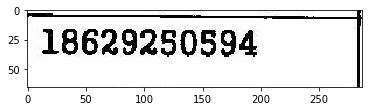

1188-6-229225500559944---------- => 18629250594



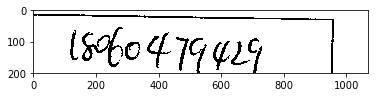

118---46-0-4-77444-299---------- => 1846047429



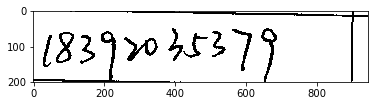

118-339922003355-3-7799--------- => 18392035379



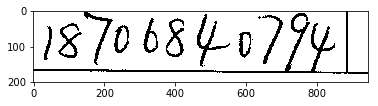

118--770006688-44--0-7779944---- => 18706840794



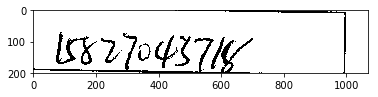

115---2277744337746------------- => 152743746



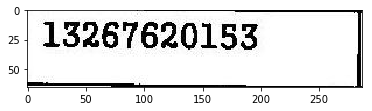

1133-2-8-76622-0-35-33---------- => 13287620353



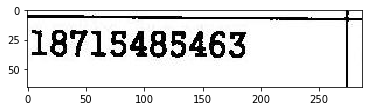

118-7-255448855446-33----------- => 18725485463



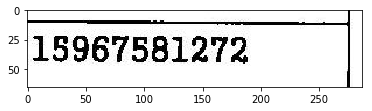

115-9-6-7558812227722----------- => 15967581272



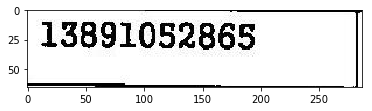

1133-8-9--005-22866-5----------- => 1389052865



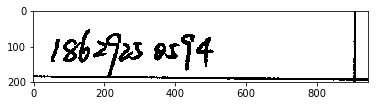

118-6-290-54-99-4--------------- => 1862905494



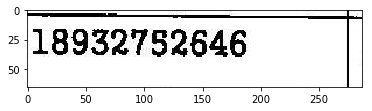

118-9-3-2275522664466----------- => 18932752646



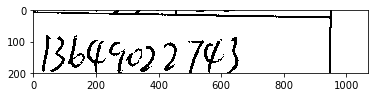

1130444100---2774433------------ => 1304102743



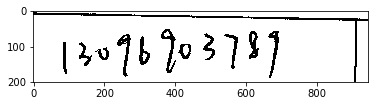

113---09766-90033-778-77-------- => 130976903787



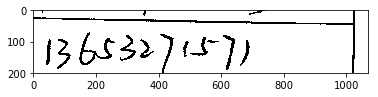

113-66553-227115-7771----------- => 13653271571



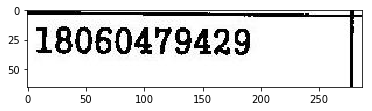

118-00660044779-422-8----------- => 18060479428



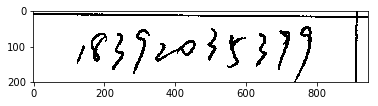

118----339922-003-5533-7-99----- => 18392035379



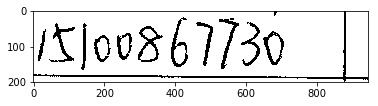

115-1100088--6-777733-00-------- => 151086730



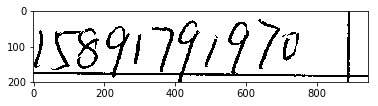

115-8--991177-991199-77-0------- => 15891791970



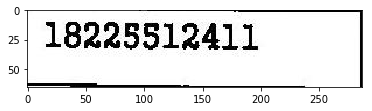

1138-2--25-3-222-4--22---------- => 1382253242



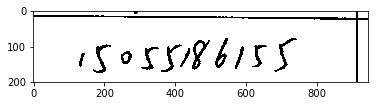

115-----0-555518-6-155-5-------- => 1505186155



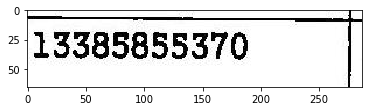

113-338-5-85555337700----------- => 1338585370



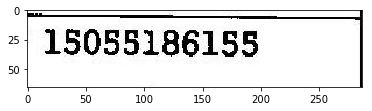

1155-005-5-288-6775555---------- => 1505528675



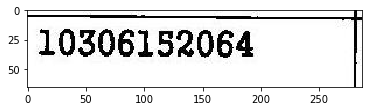

1100330066775522066-4----------- => 10306752064



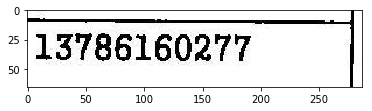

113-778866716-002-777----------- => 13786716027



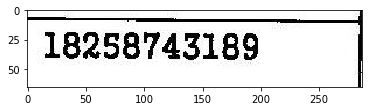

1158-22588-7-433-28-99---------- => 158258743289



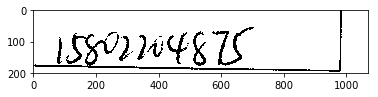

115--8102-244488-755------------ => 15810224875



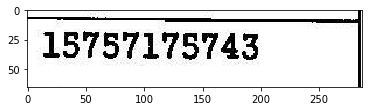

1155-775-7-27755774435---------- => 157572757435



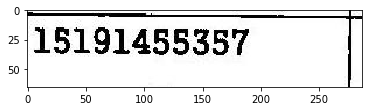

115-22992-45555335577----------- => 1529245357



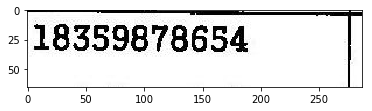

118-3-53998-788665544----------- => 183539878654



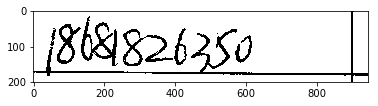

118-66818--2266335500----------- => 18681826350



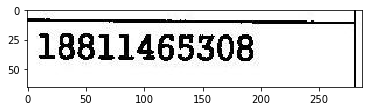

118888----446-5-33008----------- => 18465308



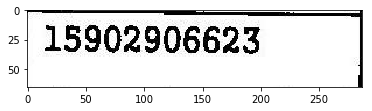

1155-99022299066662233---------- => 1590290623



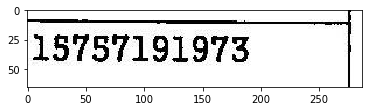

115-775-72799--997755----------- => 15757279975



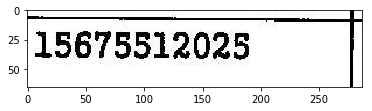

155566775-5---20022-5----------- => 1567552025



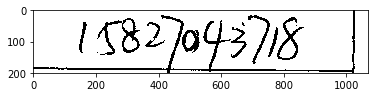

118---5-8822770-4433-7188------- => 185827043718



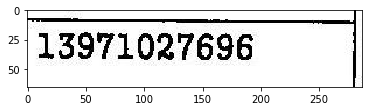

1133-977--0022776-9-6----------- => 1397027696



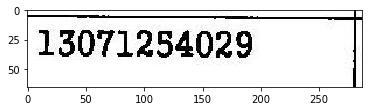

11330077--225-40002-9----------- => 1307254029



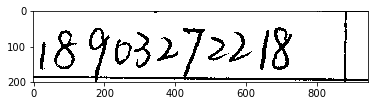

118--990033222772--22118-------- => 18903272218



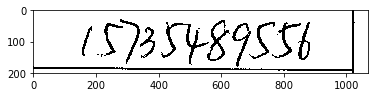

118-----773-554488-915-556------ => 187354891556



In [7]:
all_file_name = os.listdir('/home/sherlock/Documents/express_recognition/data/validation/telephone/')

for img in all_file_name:
    show_result(img)
    print()